In [1]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency


Perform Multiple line regression such :
    choose at least 5 independent variables.

In [2]:
# Load Data
Life_data = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\Life Expectancy Data.csv")
Life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# View the shape of the data
Life_data.shape

(2938, 22)

In [5]:
Life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
#check for missing values
Life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
# drop null values
Life_df= Life_data.dropna(inplace=True)
Life_df = Life_data.dropna()

In [11]:
Life_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [12]:
#check for missing values
Life_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
# check for duplicates
Life_df.duplicated().sum()

np.int64(0)

In [14]:
# View summary statistics
Life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [16]:
Life_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03


In [19]:
Life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
Life_df.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2
Adult Mortality,263.0,271.0,268.0,272.0,275.0
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
Hepatitis B,65.0,62.0,64.0,67.0,68.0
Measles,1154,492,430,2787,3013


In [20]:
Life_df.sample(15).T

,688,1580,1801,2363,1800,1963,987,1698,998,1361,954,1497,200,1152,1567
Country,Cyprus,Malawi,Namibia,Solomon Islands,Namibia,Panama,Georgia,Mexico,Germany,Kazakhstan,Gabon,Liberia,Bangladesh,Honduras,Madagascar
Year,2000,2005,2010,2013,2011,2011,2006,2000,2011,2000,2007,2008,2007,2001,2002
Status,Developed,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developed,Developing,Developing,Developing,Developing,Developing,Developing
Life expectancy,78.1,46.0,63.0,68.8,64.3,77.3,73.9,74.8,85.0,63.9,61.6,58.6,68.6,71.3,59.3
Adult Mortality,7.0,66.0,299.0,182.0,268.0,121.0,126.0,129.0,74.0,292.0,291.0,281.0,151.0,171.0,271.0
infant deaths,0,39,3,0,3,1,1,55,2,9,2,10,154,6,41
Alcohol,9.56,1.04,7.58,0.01,7.84,6.9,6.18,4.99,11.2,6.0,9.02,3.88,0.01,2.74,0.9
percentage expenditure,950.802793,5.67064,719.553516,24.733286,7.896235,119.212428,110.113829,10.228401,869.790735,112.541157,545.438957,40.033441,46.365367,15.361753,47.526214
Hepatitis B,89.0,93.0,83.0,94.0,82.0,87.0,84.0,97.0,88.0,99.0,75.0,64.0,95.0,95.0,51.0
Measles,0,184,3138,0,79,4,334,30,1607,245,0,1,2924,0,10795


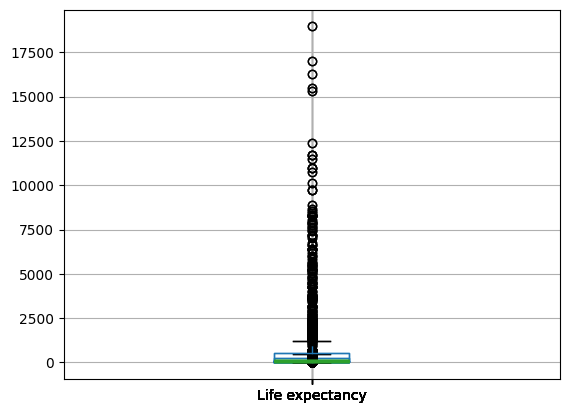

In [43]:
# Possible dependant Variables(y) are Life Expectancy, GDP, Adult Mortality, infant deaths
# Possible independant Variables(x) are Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling
# if y is Life Expectancy, then x is Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling
# if y is GDP, then x is Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, Life Expectancy, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling
# if y is Adult Mortality, then x is Life Expectancy, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling
# if y is infant deaths, then x is Adult Mortality, Life Expectancy, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling

# check for outliers
Life_df.boxplot(column=['Life expectancy'])
plt.show()

# Peform Rrgression to determine Life expectancy based on Adult Mortality, infant deaths, Alcohol, BMI, GDP.
 Multiple Line regression
y = B0 + B1(x1) + B2(x2) + B3 (x3) + B4 (x4) + B5 (x5) + E

Where :
- y is the dependent variable (the variable we are trying to predict) = Life expectancy
- B0 is the intercept or constant term
- B1, B2, B3, B4, B5 are the coefficients of the independent variables
- E is the error term (the difference between the observed and predicted values)
- x1 = Adult Mortality
- x2 = infant deaths
- x3 = Alcohol
- x4 = BMI
- x5 = GDP


In [27]:
# Strip any leading or trailing spaces from column names
Life_df.columns = Life_df.columns.str.strip()

X = Life_df[['Adult Mortality','infant deaths','Alcohol','BMI','GDP']]
X = sm.add_constant(X)  # Add constant term for regression
y = Life_df["Life expectancy"]

# Multiple Linear Regression
model = sm.OLS(y, X).fit()
print("\nMultiple Linear Regression Results: Predicting Life Expectancy")
print(model.summary())


Multiple Linear Regression Results: Predicting Life Expectancy
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     627.8
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:50:18   Log-Likelihood:                -5044.0
No. Observations:                1649   AIC:                         1.010e+04
Df Residuals:                    1643   BIC:                         1.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

# Overall Analysis
* **Adjusted R-squared(0.655)** - states that 65.5% of the variance of the Life expectancy depend on the independent variables(Adult Mortality, infant deaths, Alcohol, BMI, GDP)
* **Goodness of fit(0.00)** - states that the it is significantly lower than the p - value of 0.05 hence it is staistically significant here by indicating that at least one of the independant variables can be used to calculate the price of the house.
* **Regression equation:**  y = 69.6932 + -0.0384(x1) + -0.0042(x2) + 0.3054(x3) + 0.1075(x4) + 0.0001(x5) + 0

    * **const(69.6932)** - this shows the life expectancy if all other variables are zero
    * **Adult Mortality (-0.0384)** - this shows that the adult mortality is negatively correlated with the life expectancy and statistically significant. This means that the more adults dies, the lower the life expectancy. Therefore decreasing by 0.0384(- 3.84%) years per unit increase.
    * **infant deaths(-0.0042 )** - this shows that the infant deaths is negatively correlated with the life expectancy and statistically significant. This means that the more infacts die, the lower the life expectancy. A decrease by 0.0042(-0.42%) years per unit.
    * **Alcohol (0.3054)** - this shows that an increase in Alcohol consumption is positively correlated with the life expectancy and statistically significant. This means that the more alcohol consumption goes up the higher the life expectancy. An increase of 0.3054 years more per increament.
    * **BMI (0.1075)** - this shows that an increase in BMI is positively correlated with the life expectancy and statistically significant. This means that the more the BMI goes up the higher the life expectancy. An increase of 0.1075 years more per increament.
    * **GDP (0.0001)** - this shows that an increase in the GDP is positively correlated with the life expectancy and statistically significant. This means that the more the GDP goes up the higher the life expectancy. An increase of 0.0001 years more per increament.
    * **E** (0) - Assume there was no other external factor






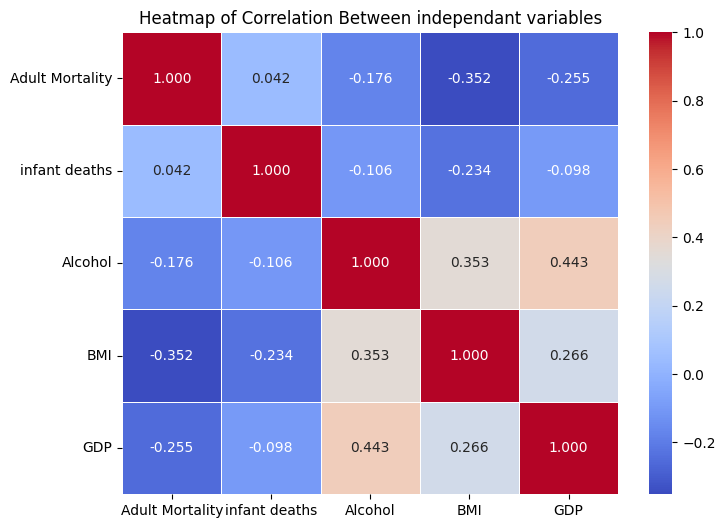

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = Life_df[['Adult Mortality','infant deaths','Alcohol','BMI','GDP']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Correlation Between independant variables")
plt.show()

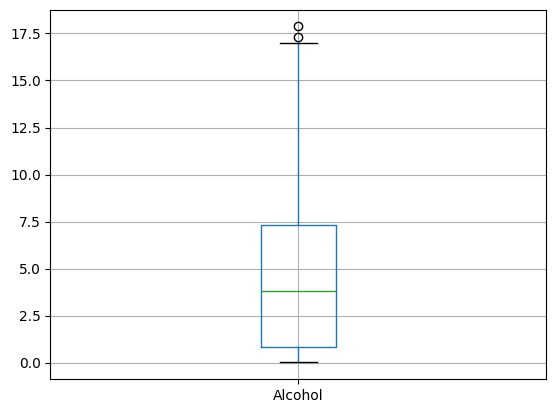

In [47]:
#Life_data.boxplot(column=['Life expectancy'])
Life_data.boxplot(column=['Alcohol'])
plt.show()